In [66]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [67]:
X = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQoZspDpm33EbFcCXEJYgH6L-Tu-a4TCrPCbZiq81fjg9r-33ayVsglzInxKav--U5L20cXB3kC9yBD/pub?output=csv')
X

,Date,Adj Close AAPL,Volume AAPL,Adj Close ABC,Volume ABC,Adj Close AMZN,Volume AMZN,Adj Close BAC,Volume BAC,Adj Close BP,...,Adj Close TM,Volume TM,Adj Close TOT,Volume TOT,Adj Close UNH,Volume UNH,Adj Close WMT,Volume WMT,Adj Close XOM,Volume XOM
0,2005-02-28,1.316963,3746232000,12.427639,20682800,35.849998,29684900,32.968975,48255000,29.017036,...,60.843304,1086900,25.259737,11717200,39.331413,20941800,37.437328,61478000,38.168442,128760400
1,2005-03-07,1.238824,4204488400,11.963464,20746800,34.750000,29673700,32.568451,41283300,28.190603,...,60.897354,1033500,25.029329,12568800,38.062389,23441200,36.379776,47133000,36.655407,170203800
2,2005-03-14,1.321578,3553877600,12.072557,18499200,34.160000,26026800,31.977856,55968800,28.584154,...,59.136475,1251700,25.292948,8275800,38.471340,25304200,36.273994,152631200,37.616077,112404900
3,2005-03-21,1.307426,2055071200,12.122155,8516800,32.880001,23236100,31.131090,50533000,26.983763,...,57.777191,1247600,24.109774,7194000,39.145905,19556000,35.822327,70161800,35.424568,88667200
4,2005-03-28,1.257898,2409145200,11.179917,59184000,34.009998,24386400,31.316097,59839000,27.442883,...,57.360142,1306800,24.425285,6156000,40.402290,31713800,34.641449,82434700,36.355190,104896100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2021-02-01,136.555939,439133200,109.235848,7789100,3352.149902,25631900,32.369999,237647600,20.532003,...,150.860001,1853400,42.320000,16378400,324.510010,21410000,144.360001,35234900,49.115902,145044300
832,2021-02-08,135.369995,345301700,104.744514,5329400,3277.709961,13237600,33.369999,193834200,21.617310,...,160.490005,2934800,42.770000,16416900,328.239990,18515000,144.470001,25487800,49.676384,138395500
833,2021-02-15,129.869995,362298700,105.870003,3276200,3249.899902,13185300,34.540001,190095000,22.564486,...,153.550003,1467500,44.970001,9539700,324.579987,11655700,138.339996,62243200,52.369999,96610400
834,2021-02-22,121.260002,683784700,101.220001,4993900,3092.929932,19957700,34.709999,327837000,24.410000,...,147.929993,2052000,46.400002,14423100,332.220001,17481300,129.919998,61844300,54.369999,163519200


In [68]:
# convert `date` column to numerical values
# more precisely number of days since 1st january 1AD
X['Date'] = pd.to_datetime(X['Date'])
X['Date'] = X['Date'].map(dt.datetime.toordinal)

In [69]:
# make a deep copy of X dataframe, drop `Date` column,shift all columns forward
# and drop NA values
Y = X.copy(deep=True).drop(labels='Date', axis=1).shift(-1).dropna()
Y

,Adj Close AAPL,Volume AAPL,Adj Close ABC,Volume ABC,Adj Close AMZN,Volume AMZN,Adj Close BAC,Volume BAC,Adj Close BP,Volume BP,...,Adj Close TM,Volume TM,Adj Close TOT,Volume TOT,Adj Close UNH,Volume UNH,Adj Close WMT,Volume WMT,Adj Close XOM,Volume XOM
0,1.238824,4.204488e+09,11.963464,20746800.0,34.750000,29673700.0,32.568451,41283300.0,28.190603,20307100.0,...,60.897354,1033500.0,25.029329,12568800.0,38.062389,23441200.0,36.379776,47133000.0,36.655407,170203800.0
1,1.321578,3.553878e+09,12.072557,18499200.0,34.160000,26026800.0,31.977856,55968800.0,28.584154,15497500.0,...,59.136475,1251700.0,25.292948,8275800.0,38.471340,25304200.0,36.273994,152631200.0,37.616077,112404900.0
2,1.307426,2.055071e+09,12.122155,8516800.0,32.880001,23236100.0,31.131090,50533000.0,26.983763,15531900.0,...,57.777191,1247600.0,24.109774,7194000.0,39.145905,19556000.0,35.822327,70161800.0,35.424568,88667200.0
3,1.257898,2.409145e+09,11.179917,59184000.0,34.009998,24386400.0,31.316097,59839000.0,27.442883,15717000.0,...,57.360142,1306800.0,24.425285,6156000.0,40.402290,31713800.0,34.641449,82434700.0,36.355190,104896100.0
4,1.345573,2.708017e+09,11.471516,30875600.0,34.599998,24371600.0,31.792841,44185900.0,27.648401,16214000.0,...,58.888752,1218300.0,24.394154,7033000.0,41.499165,30453600.0,34.344475,84086800.0,36.030968,85301200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,136.555939,4.391332e+08,109.235848,7789100.0,3352.149902,25631900.0,32.369999,237647600.0,20.532003,146399000.0,...,150.860001,1853400.0,42.320000,16378400.0,324.510010,21410000.0,144.360001,35234900.0,49.115902,145044300.0
831,135.369995,3.453017e+08,104.744514,5329400.0,3277.709961,13237600.0,33.369999,193834200.0,21.617310,95017100.0,...,160.490005,2934800.0,42.770000,16416900.0,328.239990,18515000.0,144.470001,25487800.0,49.676384,138395500.0
832,129.869995,3.622987e+08,105.870003,3276200.0,3249.899902,13185300.0,34.540001,190095000.0,22.564486,61151200.0,...,153.550003,1467500.0,44.970001,9539700.0,324.579987,11655700.0,138.339996,62243200.0,52.369999,96610400.0
833,121.260002,6.837847e+08,101.220001,4993900.0,3092.929932,19957700.0,34.709999,327837000.0,24.410000,110431100.0,...,147.929993,2052000.0,46.400002,14423100.0,332.220001,17481300.0,129.919998,61844300.0,54.369999,163519200.0


In [70]:
# create additional column with intercept
X.insert(0, 'Intercept', 1)
X

,Intercept,Date,Adj Close AAPL,Volume AAPL,Adj Close ABC,Volume ABC,Adj Close AMZN,Volume AMZN,Adj Close BAC,Volume BAC,...,Adj Close TM,Volume TM,Adj Close TOT,Volume TOT,Adj Close UNH,Volume UNH,Adj Close WMT,Volume WMT,Adj Close XOM,Volume XOM
0,1,732005,1.316963,3746232000,12.427639,20682800,35.849998,29684900,32.968975,48255000,...,60.843304,1086900,25.259737,11717200,39.331413,20941800,37.437328,61478000,38.168442,128760400
1,1,732012,1.238824,4204488400,11.963464,20746800,34.750000,29673700,32.568451,41283300,...,60.897354,1033500,25.029329,12568800,38.062389,23441200,36.379776,47133000,36.655407,170203800
2,1,732019,1.321578,3553877600,12.072557,18499200,34.160000,26026800,31.977856,55968800,...,59.136475,1251700,25.292948,8275800,38.471340,25304200,36.273994,152631200,37.616077,112404900
3,1,732026,1.307426,2055071200,12.122155,8516800,32.880001,23236100,31.131090,50533000,...,57.777191,1247600,24.109774,7194000,39.145905,19556000,35.822327,70161800,35.424568,88667200
4,1,732033,1.257898,2409145200,11.179917,59184000,34.009998,24386400,31.316097,59839000,...,57.360142,1306800,24.425285,6156000,40.402290,31713800,34.641449,82434700,36.355190,104896100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,737822,136.555939,439133200,109.235848,7789100,3352.149902,25631900,32.369999,237647600,...,150.860001,1853400,42.320000,16378400,324.510010,21410000,144.360001,35234900,49.115902,145044300
832,1,737829,135.369995,345301700,104.744514,5329400,3277.709961,13237600,33.369999,193834200,...,160.490005,2934800,42.770000,16416900,328.239990,18515000,144.470001,25487800,49.676384,138395500
833,1,737836,129.869995,362298700,105.870003,3276200,3249.899902,13185300,34.540001,190095000,...,153.550003,1467500,44.970001,9539700,324.579987,11655700,138.339996,62243200,52.369999,96610400
834,1,737843,121.260002,683784700,101.220001,4993900,3092.929932,19957700,34.709999,327837000,...,147.929993,2052000,46.400002,14423100,332.220001,17481300,129.919998,61844300,54.369999,163519200


In [71]:
# let's drop last row so we have same number rows as in Y 
# (where we make forward shift by 1)
X = X.iloc[0:-1]
X.shape

(835, 42)

# Scikit-learn linear regression

In [72]:
linear_model = LinearRegression(fit_intercept=False)
fit = linear_model.fit(X, Y)

In [73]:
coefs_lib = fit.coef_
coefs_lib.shape
# On top of Y's columns, X has date and intercept

(40, 42)

In [74]:
norms_lib = np.apply_along_axis(np.linalg.norm, 1, coefs_lib)
norms_lib.shape
# Each y column has its own coefficient vector

(40,)

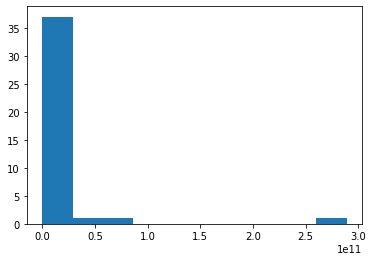

In [75]:
plt.hist(norms_lib)
plt.show()

# Regression using pseudo inverse

In [76]:
X_pinverse = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)

In [77]:
coefs_pinv = np.dot(X_pinverse, Y)
norms_pinv = np.apply_along_axis(np.linalg.norm, 0, coefs_pinv)

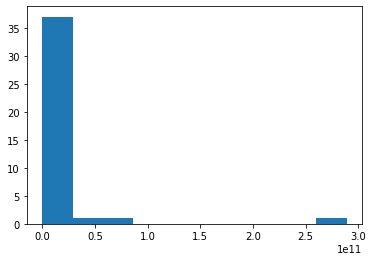

In [78]:
plt.hist(norms_pinv)
plt.show()

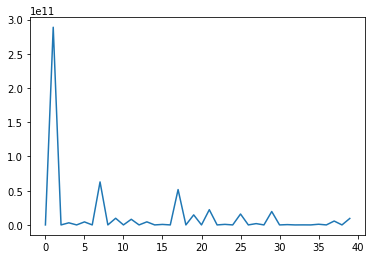

In [79]:
plt.plot(norms_pinv)
plt.show()

# QR pseudo inverse

In [80]:
Q, R = np.linalg.qr(X)
X_qr_pinverse = np.dot(np.linalg.inv(R), Q.T)

In [81]:
coefs_qr = np.dot(X_qr_pinverse, Y)
norms_qr = np.apply_along_axis(np.linalg.norm, 0, coefs_qr)

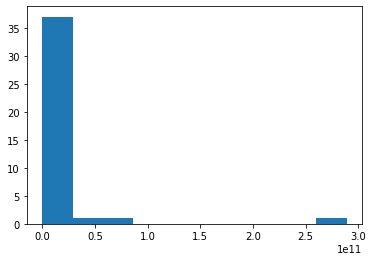

In [82]:
plt.hist(norms_qr)
plt.show()

# Deltas

In [83]:
coef_dif__simple_QR = coefs_pinv - coefs_qr
coef_dif__simple_QR

array([[-3.49064794e-06, -7.07621704e+02, -4.77783487e-06, ...,
         2.39291048e+01, -5.33301318e-07,  3.58675232e+01],
       [ 4.95185663e-12,  9.82458238e-04,  6.91386098e-12, ...,
        -3.22244787e-05,  1.15890370e-12, -4.82376490e-05],
       [ 8.43110026e-11,  1.42623596e-02,  1.33098865e-10, ...,
        -3.52822186e-04,  6.53116450e-11, -5.20445174e-04],
       ...,
       [-4.71923083e-20, -6.80577816e-12, -7.38457220e-20, ...,
         4.34902114e-13,  3.27828220e-20,  5.51867579e-13],
       [ 1.33607014e-12,  2.25353986e-04,  1.80855331e-12, ...,
        -1.03246421e-05, -4.97379915e-14, -1.46746170e-05],
       [ 3.92395954e-18,  7.02485958e-10,  5.95812901e-18, ...,
        -1.95710045e-11,  2.29584641e-18, -2.89971380e-11]])

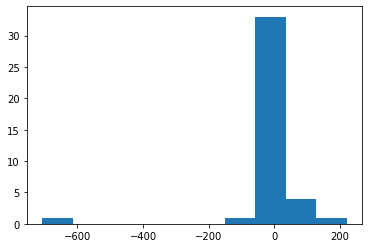

In [84]:
plt.hist(coef_dif__simple_QR[0])
plt.show()

In [85]:
delta_simple_QR = np.average(np.abs(coef_dif))
delta_simple_QR
# 0.015 on local machine

0.8849542854474339

In [86]:
# The library coefficients have the different shape
delta_simple_lib = np.average(np.abs(coefs_pinv - coefs_lib.T))
delta_simple_lib
# 0.21 on local machine

0.8370496624402638

In [87]:
delta_lib_QR = np.average(np.abs(coefs_lib.T - coefs_qr))
delta_lib_QR
# 0.22 on local machine

0.18280862810505602

Input data is different on local machine. 
Especially the volume